In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
#Import data
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
#read data
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#drop unnecessary columns
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
#rename column names
data.columns=['category','message']

In [6]:
data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#generate discriptive statistics
data.describe()

,category,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
#check Null or not
data.isnull().sum()

category    0
message     0
dtype: int64

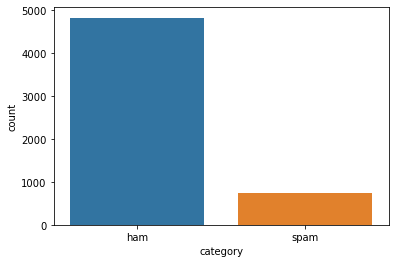

In [9]:
sns.countplot(x='category',data=data)
plt.show()

In [10]:
data['message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

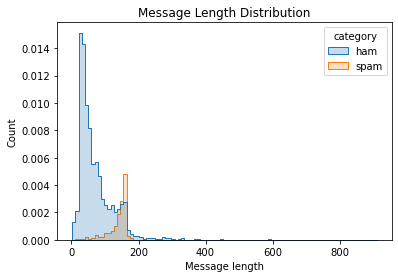

In [11]:
data['message_len']=data['message'].apply(len)
sns.histplot(data=data,x=data['message_len'],hue='category',element='step',stat='density')
plt.title('Message Length Distribution')
plt.xlabel('Message length')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='category', ylabel='message_len'>

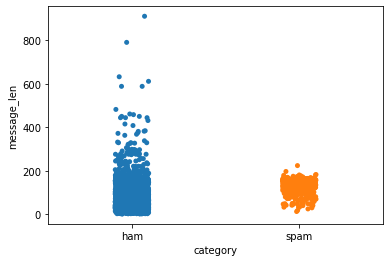

In [12]:
sns.stripplot(data=data,x='category',y=data['message_len'])

In [13]:
data.drop_duplicates(inplace=True)
data=data.fillna(' ')

In [14]:
#split data into train and test
train,test=train_test_split(data,test_size=0.30)
train_x=data['message'].values
train_y=data['category'].values

test_x=data['message'].values
test_y=data['category'].values

In [15]:
cv=CountVectorizer()
train_x=cv.fit_transform(train_x)
test_x=cv.transform(test_x)

In [16]:
#train model using vector method
model=SVC()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)

0.995550396595086

In [17]:
result=pd.DataFrame({'Actual':test_y,'Predicted':predct})

In [18]:
#accuracy of testing and test dataset
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

0.995550396595086
0.995550396595086


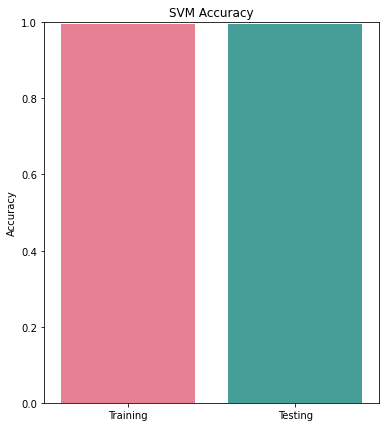

In [19]:
#plot the result
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('SVM Accuracy')
plt.show()

In [20]:
#train model using RandomForestClassifier
model=RandomForestClassifier()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)

1.0

In [21]:
#accuracy of train and test dataset
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

1.0
1.0


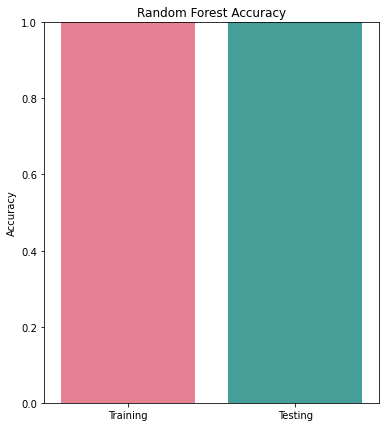

In [22]:
#plot the result
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()